In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

/var/folders/4v/hcqt1p7s1859vr42874pyy8r0000gn/T/ipykernel_80633/1505154652.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('data/pnas_art_data.csv')
df.head()

,Unnamed: 0,P_idx,Artist,Title,Year,Nationality,Style,DataSrc,url,Img_width,...,AspectRatio,H0(3-bit median),I1,I2,Dir1,Dir2,Rc1,Rc2,Line1_(y1y2x1x2_with_top_left_origin),Line2_(y1y2x1x2_with_top_left_origin)
0,11929,0,"Aagaard, carl frederik",The Rose Garden,1877,Danish,Realism,WGA,http://www.wga.hu/html/a/aagaard/rosegard.html,950,...,1.085714,1.960759,0.128987,0.084821,h,v,0.347926,0.255000,"(151, 151, 0, 400)","(151, 434, 102, 102)"
1,11930,1,"Aagaard, carl frederik",Deer beside a Lake,1888,Danish,Realism,WGA,http://www.wga.hu/html/a/aagaard/deerlake.html,818,...,0.681667,1.787271,0.064063,0.058686,h,v,0.852941,0.857500,"(232, 232, 0, 400)","(0, 232, 343, 343)"
2,11931,2,"ABBATE, Niccolo dell'",Stag Hunt,1552,Italian,Mannerism,WGA,http://www.wga.hu/html/a/abbate/deerhunt.html,761,...,0.658304,1.323843,0.202154,0.103790,h,v,0.429658,0.665000,"(113, 113, 0, 400)","(0, 113, 266, 266)"
3,11932,3,"ABBATE, Niccolo dell'",The Rape of Proserpine,1570,Italian,Mannerism,WGA,http://www.wga.hu/html/a/abbate/proserpi.html,820,...,0.873269,1.774385,0.132212,0.067208,h,v,0.512894,0.760000,"(179, 179, 0, 400)","(0, 179, 304, 304)"
4,11933,4,"Abbati, giuseppe",Country Road with Cypresses,1860,Italian,Realism,WGA,http://www.wga.hu/html/a/abbati/abbati2.html,850,...,0.747581,1.534873,0.069923,0.079703,h,h,0.157191,0.440476,"(47, 47, 0, 400)","(158, 158, 0, 400)"


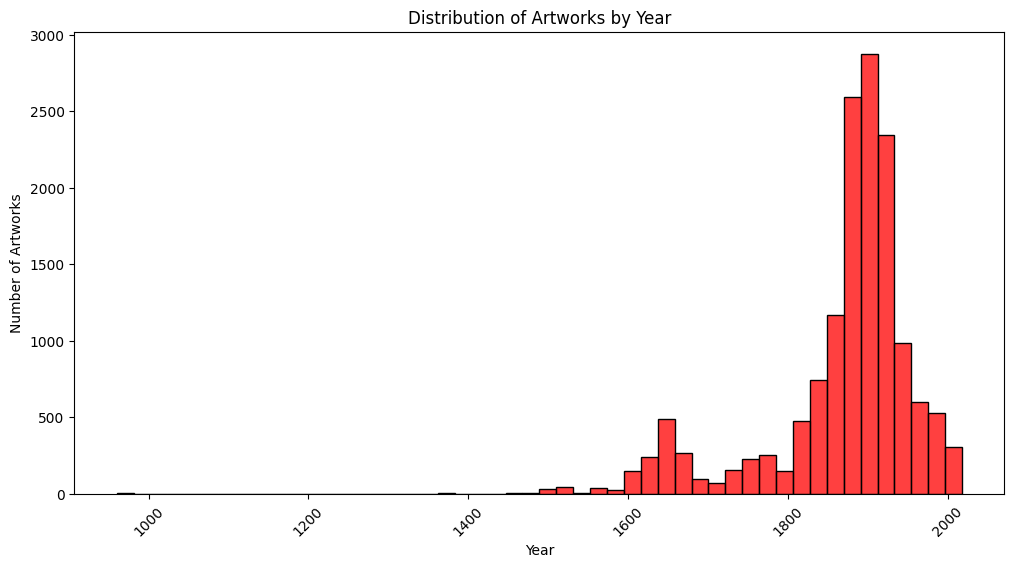

In [4]:
# Artworks by Year
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Year', bins=50, kde=False, color='red', edgecolor='black')
plt.title('Distribution of Artworks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.show()

In [12]:
def clean_style(style_str):
    try:
        if '$$' in style_str:
            return style_str.replace('$$',' ')
        else:
            return style_str
    except TypeError:
        print(f'issue: {style_str}')
        return None

In [13]:
df['Style'] = df['Style'].apply(clean_style)

issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan

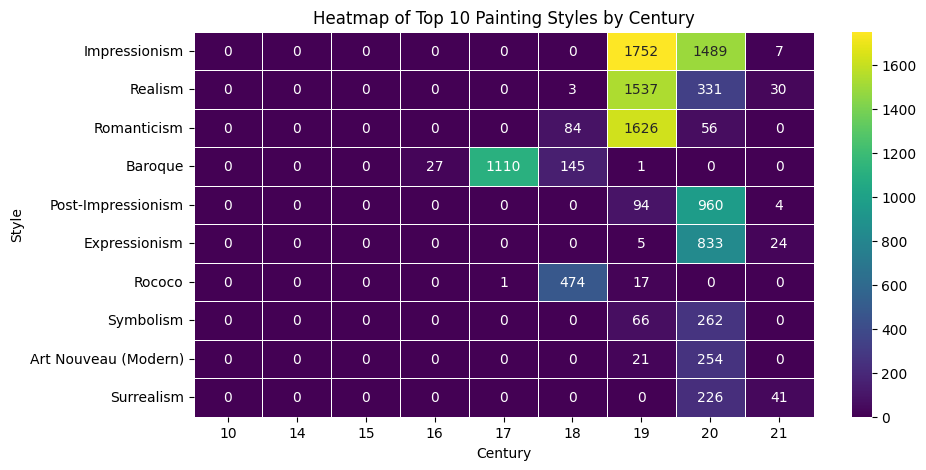

In [38]:
pivot_table = df.pivot_table(index='Style', columns='Century', aggfunc='size', fill_value=0)
df['Century'] = ((df['Year']//100 )+1).astype(int)

style_sums = pivot_table.sum(axis=1)
top_styles = style_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_styles.index]

plt.figure(figsize=(10, 5))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Painting Styles by Century')
plt.xlabel('Century')
plt.ylabel('Style')
plt.show()

In [ ]:
# Sum the artworks for each style across all centuries


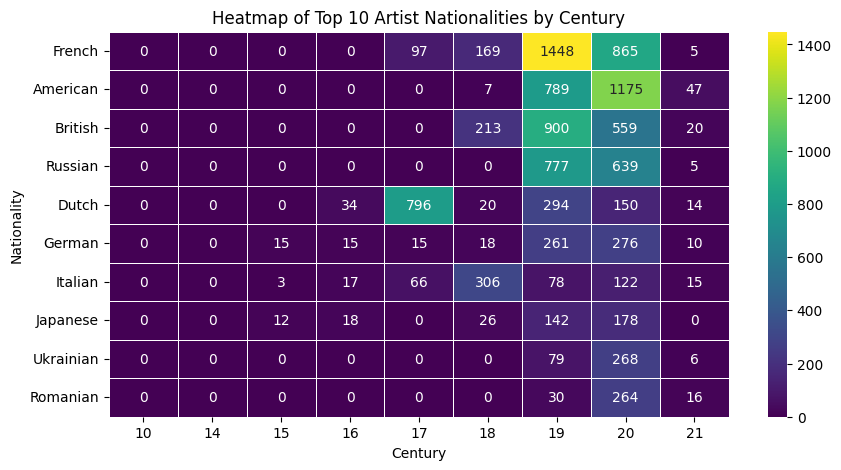

In [41]:
pivot_table = df.pivot_table(index='Nationality', columns='Century', aggfunc='size', fill_value=0)

df['Century'] = ((df['Year']//100 )+1).astype(int)

nationality_sums = pivot_table.sum(axis=1)
top_nationalities = nationality_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_nationalities.index]

plt.figure(figsize=(10, 5))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Artist Nationalities by Century')
plt.xlabel('Century')
plt.ylabel('Nationality')
plt.show()

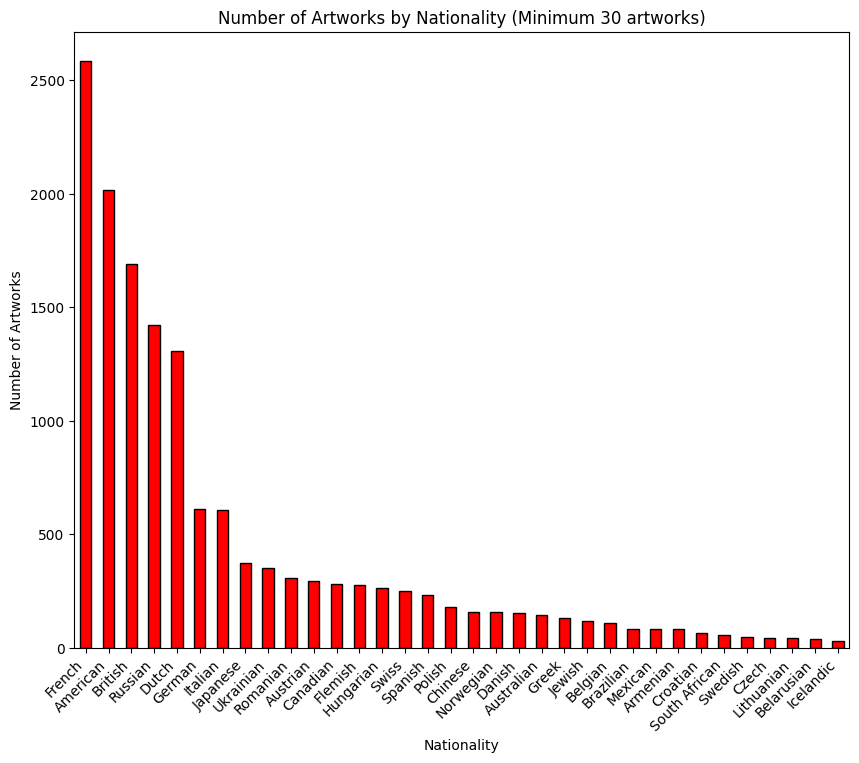

In [25]:
nationality_counts = df['Nationality'].value_counts()
filtered_nationality_counts = nationality_counts[nationality_counts >= 30]
sorted_nationality_counts = filtered_nationality_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sorted_nationality_counts.plot(kind='bar', color='red', edgecolor = 'black')
plt.title('Number of Artworks by Nationality (Minimum 30 artworks)')
plt.xlabel('Nationality')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')  
plt.show()